In [2]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Normalize time and ensure all terms are dimensionless
model_eqs = '''
dRe_z/dt = (0.5 * (K * Re_z + F) -0.5 * (K * Re_z**3 + Re_z**2 * F 
    - K * Re_z * Im_z**2 - F * Im_z**2 + 2 * Re_z * K * Im_z**2) 
    - Delta * Re_z + Im_z * Omega) / second: 1
dIm_z/dt = (0.5 * (K * Im_z) - 0.5 * (-K * Re_z**2 
    * Im_z + K * Im_z**3 + 2 * Re_z**2 * Im_z * K + 2 * Re_z * Im_z * F) 
    - Delta * Im_z - Re_z * Omega) / second: 1
K : 1  # Dimensionless
F : 1  # Dimensionless
Delta : 1  # Dimensionless
Omega : 1  # Dimensionless
'''

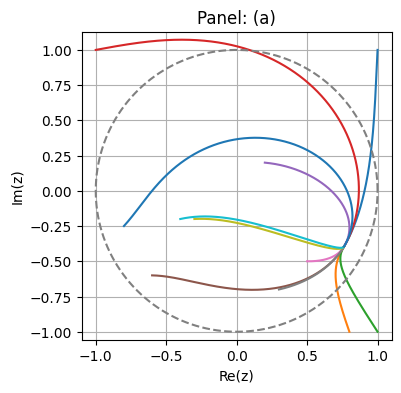

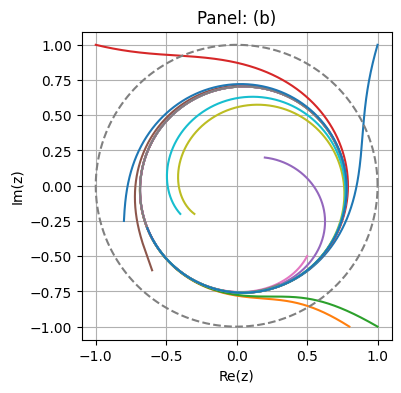

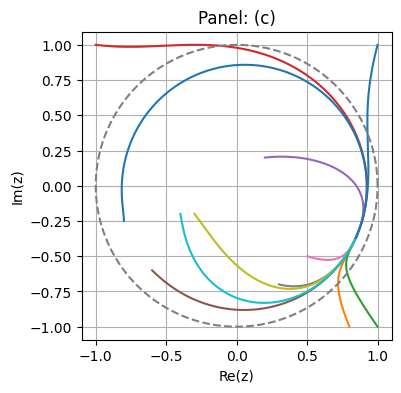

In [14]:
# Define parameters
start_scope()
initial_values = [[4.5, 3, 1.4], [4.5, 0.65, 1.4], [10.0, 3.5, 1.4]]
letters = ["(a)", "(b)", "(c)"]
Delta = 1.0      # Dissipation (dimensionless)
t_sim = 5 * second # Simulation time
dt = 0.05 * second  # Time step

# Initial conditions
initial_conditions = [
    1 + 1j, 0.8 -1j, 1 -1j, -1 + 1j, 0.2 + 0.2j, -0.6 -0.6j, 0.5 - 0.5j, 0.3 - 0.7j, 
    -0.3 - 0.2j, -0.4 - 0.2j, -0.8 - 0.25j
]


# Plot the results
# Create a NeuronGroup for each initial condition
for count, arr in enumerate(initial_values):
    plt.figure(figsize=(4, 4)) 
    for z0 in initial_conditions:
        G = NeuronGroup(1, model=model_eqs, method='euler')
        G.Re_z = z0.real  # Set initial real part
        G.Im_z = z0.imag  # Set initial imaginary part
        G.K = arr[0]
        G.F = arr[1]
        G.Delta = Delta
        G.Omega = arr[2]

        # Record the dynamics
        M = StateMonitor(G, ['Re_z', 'Im_z'], record=True)
        run(t_sim)
        plt.plot(M.Re_z[0], M.Im_z[0])  # Append trajectory for this initial condition

    # Plot the unit circle for reference
    theta = np.linspace(0, 2 * np.pi, 500)
    plt.plot(np.cos(theta), np.sin(theta), '--', color="gray")

    # Labels and formatting
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.title(f"Panel: {letters[count]}")
    plt.axis("equal")
    plt.grid()
    plt.show()


0.7616239107923922 -0.39597697498129236


WARNING    'F' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 3. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'K' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 4.5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Omega' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 1.4. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


0.8463029552029584 -0.3679447266768801


WARNING    'F' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 3. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'K' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 4.5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Omega' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 1.4. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'F' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 3.5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'K' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 10.0. The internal variable wil

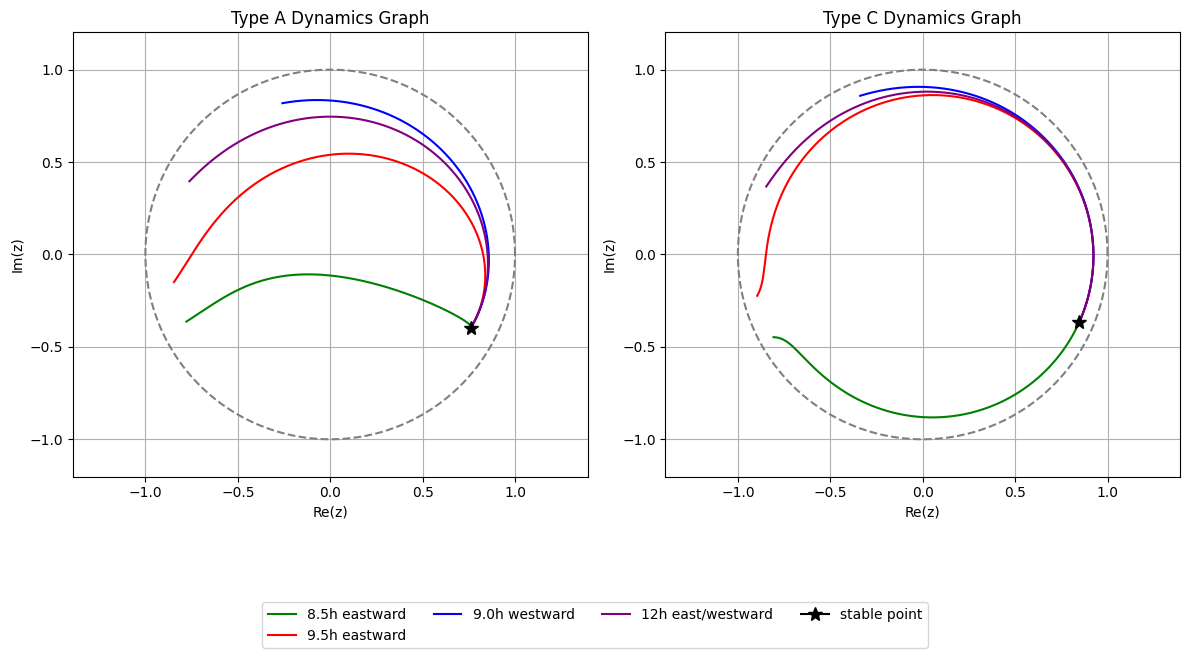

In [7]:
#Find Stable Points
start_scope()
initial_values = [[4.5, 3, 1.4], [10.0, 3.5, 1.4]]
new_letters = ["A", "C"]
Delta = 1.0
t_sim = 5 * second # Simulation time
dt = 0.05 * second  # Time step
travel_points = [-8.5, -9.5, 9.0, 12.0]  # Travel points

# Initialize stable points
stable_points_real = []
stable_points_imag = []

# Compute stable points for each initial condition
for count, arr in enumerate(initial_values):
    G = NeuronGroup(1, model=model_eqs, method='euler')
    G.Re_z = -1  # Set initial real part
    G.Im_z = -1  # Set initial imaginary part
    G.K = arr[0]
    G.F = arr[1]
    G.Delta = Delta
    G.Omega = arr[2]
    M = StateMonitor(G, ['Re_z', 'Im_z'], record=True)
    run(t_sim)
    print(M.Re_z[0][-1], M.Im_z[0][-1])
    stable_points_real.append(M.Re_z[0][-1])
    stable_points_imag.append(M.Im_z[0][-1])
# Create subplots for side-by-side graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ['green', 'red', 'blue', 'purple']  # Colors for each travel point
labels = ['8.5h eastward', '9.5h eastward', '9.0h westward', '12h east/westward']

for count, (arr, ax) in enumerate(zip(initial_values, axes)):
    K = arr[0]
    F = arr[1]
    Omega = arr[2]
    # Plot trajectories for each travel point
    for i, val in enumerate(travel_points):
        p_change = val * 2 * np.pi / 24
        z_st = stable_points_real[count] + 1j * stable_points_imag[count]
        z_0 = z_st * np.exp(1j * p_change)
        G = NeuronGroup(1, model=model_eqs, method='euler')
        G.Re_z = z_0.real  # Set initial real part
        G.Im_z = z_0.imag  # Set initial imaginary part
        G.K = arr[0]
        G.F = arr[1]
        G.Delta = Delta
        G.Omega = arr[2]
        M = StateMonitor(G, ['Re_z', 'Im_z'], record=True)
        run(t_sim)
        ax.plot(
            M.Re_z[0], M.Im_z[0],
            color=colors[i], label=labels[i] if count == 0 else None
        )
    
    # Plot unit circle for reference
    circle = np.linspace(0, 2 * np.pi, 500)
    ax.plot(np.cos(circle), np.sin(circle), '--', color="gray")
    
    # Plot the stable point
    ax.plot(
        stable_points_real[count], stable_points_imag[count],
        marker='*', color='black', markersize=10,
        label='stable point' if count == 0 else None  # Label only in the first subplot
    )
    # Formatting
    ax.set_xlabel("Re(z)")
    ax.set_ylabel("Im(z)")
    ax.set_title(f"Type {new_letters[count]} Dynamics Graph")
    ax.axis("equal")
    ax.grid()

# Add combined legend below both subplots
fig.legend(
    loc='lower center', bbox_to_anchor=(0.5, -0.1),
    ncol=4, fontsize=10, frameon=True
)

# Adjust layout to fit everything nicely
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space for the legend
plt.show()


[0.31846986 0.31861403 0.31875816 ... 0.79776522 0.79776541 0.7977656 ] [-0.80885847 -0.80877647 -0.80869448 ... -0.3455757  -0.34557532
 -0.34557495]
[-0.34675711 -0.34658794 -0.34641876 ...  0.79638285  0.79638349
  0.79638414] [-0.79714151 -0.79715381 -0.79716612 ... -0.34828966 -0.3482884
 -0.34828714]
[-0.80885847 -0.80878838 -0.8087183  ...  0.79784749  0.7978483
  0.79784911] [-0.31846986 -0.31843244 -0.31839502 ... -0.34090186 -0.34090324
 -0.34090462]
[-0.79714151 -0.79697223 -0.79680288 ...  0.80095968  0.80095884
  0.800958  ] [ 0.34675711  0.34694984  0.34714258 ... -0.33911827 -0.33912
 -0.33912173]
[0.80885847 0.80894489 0.80903123 ... 0.79875731 0.79875717 0.79875704] [ 0.31846986  0.31825212  0.31803444 ... -0.3435981  -0.34359836
 -0.34359863]
[0.34675711 0.34711825 0.34747927 ... 0.79916181 0.79916154 0.79916128] [ 0.79714151  0.79696032  0.79677903 ... -0.34278474 -0.34278527
 -0.3427858 ]
[-0.31846986 -0.31807054 -0.31767115 ...  0.79971814  0.79971769
  0.79971725]

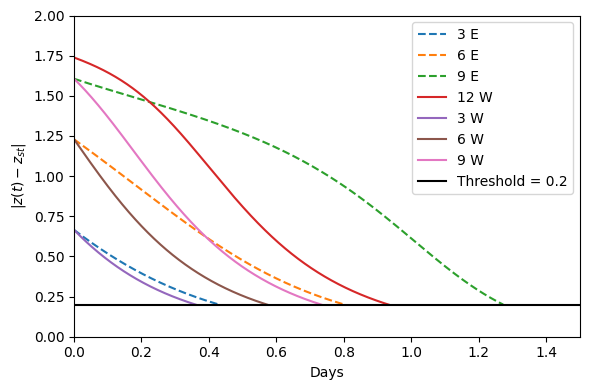

In [12]:
start_scope()
Delta = 1 #WRONG DELTA -> can't get it to work with other delta
Omega = 1.4 * Delta
K = 4.5 * Delta
F = 3.5 * Delta
t_sim = 2 * second # Simulation time
G = NeuronGroup(1, model=model_eqs, method='euler')
G.Re_z = -0.3  # Set initial real part
G.Im_z = -0.3  # Set initial imaginary part
G.K = K
G.F = F
G.Delta = Delta
G.Omega = Omega
M = StateMonitor(G, ['Re_z', 'Im_z'], record=True)
run(t_sim)
stable_point_real = M.Re_z[0][-1]
stable_point_imag = M.Im_z[0][-1]
#print(stable_point_real, stable_point_imag)
travel_points = [-3, -6, -9, 12, 3, 6, 9]

plt.figure(figsize=(6, 4))
for val in travel_points: 
    p_change = val * 2 * np.pi / 24
    z_st = stable_point_real + 1j * stable_point_imag
    z_0 = z_st * np.exp(1j * p_change)
    G = NeuronGroup(1, model=model_eqs, method='euler')
    G.Re_z = z_0.real  # Set initial real part
    G.Im_z = z_0.imag  # Set initial imaginary part
    G.K = K
    G.F = F
    G.Delta = Delta
    G.Omega = Omega
    M = StateMonitor(G, ['Re_z', 'Im_z'], record=True)
    run(t_sim)
    Real = M.Re_z[0]
    Imag = M.Im_z[0]
    print(Real, Imag)
    t = M.t / second
    #condition_mask = np.abs(Real + 1j * Imag - z_st) > 0.2
    #Real = Real[condition_mask]
    #Imag = Imag[condition_mask]
    #t = t[condition_mask]
    deviation = np.sqrt((Real-stable_point_real)**2 + (Imag-stable_point_imag)**2)
    mask = deviation > 0.2
    t_filtered = t[mask]
    deviation_filtered = deviation[mask]
    linestyle = "-" if val > 0 else "--"
    plt.plot(t_filtered, deviation_filtered, linestyle=linestyle, label=f"{abs(val)} {'W' if val > 0 else 'E'}")
plt.axhline(y=0.2, color='black', linestyle='-', label='Threshold = 0.2')
plt.ylim(0, 2)
plt.xlim(0, 1.5)
plt.xlabel('Days')
plt.ylabel(r'$|z(t) - z_{st}|$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

    


